<b>`Import Libraries`</b>

In [8]:
# Import all the libraries for Data Analysis, Visualisation, Random Forest & Logisic Regression

# Libraries for Dataset analysis
import pandas as pd
import numpy as np

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

# For Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Split the data into traning & test data sets
from sklearn.model_selection import train_test_split

# For Standardisation & Scaling
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

# For building logistic regression model
import statsmodels.api as sm

# Import RFE used in feature elimination
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Check for VIF value of the variable
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Import  compute accuracy scores & Confusion matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import gc 

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
                        
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#Importing the PCA module
from sklearn.decomposition import PCA

# import SMOTE module from imblearn library 
from imblearn.over_sampling import SMOTE

# For building logistic regression model
import statsmodels.api as sm

# Import RFE used in feature elimination
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

<b>`TASK 2: USER ENGAGEMENT ANALYSIS`
    
    Track the user’s engagement using the following engagement metrics:

        1. sessions frequency
        2. the duration of the session
        3. the sessions total traffic (download and upload (bytes))

In [22]:
data = pd.read_csv('../data/Task1_clean_data.csv')
data.head()

,bearer_id,start,start_ms,end,end_ms,dur._(ms),imsi,msisdn/number,imei,last_location_name,...,total_ul_(bytes),total_dl_(bytes),social_media,google,email,youtube,netflix,gaming,other,total_data
0,1.311448e+19,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,36749741.0,308879636.0,1.570185,2.905912,3.701304,18.355943,17.855187,292.426453,180.558843,345.629377
1,1.311448e+19,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,53800391.0,653384965.0,1.933278,4.414096,0.937385,39.359124,35.565545,609.920783,541.959383,707.185356
2,1.311448e+19,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,27883638.0,279807335.0,1.726277,10.229119,3.363124,34.425237,23.751202,229.980251,414.908351,307.690973
3,1.311448e+19,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,43324218.0,846028530.0,0.657493,11.811761,2.070983,36.534765,15.092588,810.387875,761.837216,889.352748
4,1.311448e+19,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,38542814.0,569138589.0,0.912788,7.748843,2.110349,34.222253,17.539799,531.237049,564.619822,607.681403


In [23]:
df = data.copy()

In [24]:
df.isna().sum()

bearer_id     0
start         0
start_ms      0
end           0
end_ms        0
             ..
youtube       0
netflix       0
gaming        0
other         0
total_data    0
Length: 63, dtype: int64

<b>`2.1.1 - 
    Top 10 customers per engagement metric`</b>

In [21]:
df.columns

Index(['bearer_id', 'start', 'start_ms', 'end', 'end_ms', 'dur._(ms)', 'imsi',
       'msisdn/number', 'imei', 'last_location_name', 'avg_rtt_dl_(ms)',
       'avg_rtt_ul_(ms)', 'avg_bearer_tp_dl_(kbps)', 'avg_bearer_tp_ul_(kbps)',
       'tcp_dl_retrans._vol_(bytes)', 'tcp_ul_retrans._vol_(bytes)',
       'dl_tp_<_50_kbps_(%)', '50_kbps_<_dl_tp_<_250_kbps_(%)',
       '250_kbps_<_dl_tp_<_1_mbps_(%)', 'dl_tp_>_1_mbps_(%)',
       'ul_tp_<_10_kbps_(%)', '10_kbps_<_ul_tp_<_50_kbps_(%)',
       '50_kbps_<_ul_tp_<_300_kbps_(%)', 'ul_tp_>_300_kbps_(%)',
       'http_dl_(bytes)', 'http_ul_(bytes)', 'activity_duration_dl_(ms)',
       'activity_duration_ul_(ms)', 'dur._(ms).1', 'handset_manufacturer',
       'handset_type', 'nb_of_sec_with_125000b_<_vol_dl',
       'nb_of_sec_with_1250b_<_vol_ul_<_6250b',
       'nb_of_sec_with_31250b_<_vol_dl_<_125000b',
       'nb_of_sec_with_37500b_<_vol_ul',
       'nb_of_sec_with_6250b_<_vol_dl_<_31250b',
       'nb_of_sec_with_6250b_<_vol_ul_<_37500b',


<i>`Top 10 customers per session freuency`</i>

In [25]:
top10_customers_by_session=df.groupby('msisdn/number').agg({'bearer_id':'count'}).reset_index().sort_values('bearer_id',ascending=False).head(10)
top10_customers_by_session

,msisdn/number,bearer_id
53644,3.366371e+10,1067
13526,3.362632e+10,18
6437,3.361489e+10,17
13180,3.362578e+10,17
37052,3.365973e+10,16
76363,3.367588e+10,15
92923,3.376054e+10,15
65118,3.366716e+10,13
1279,3.360452e+10,12
92577,3.376041e+10,12


Text(0.5, 1.0, 'Top 10 customers by session frequency')

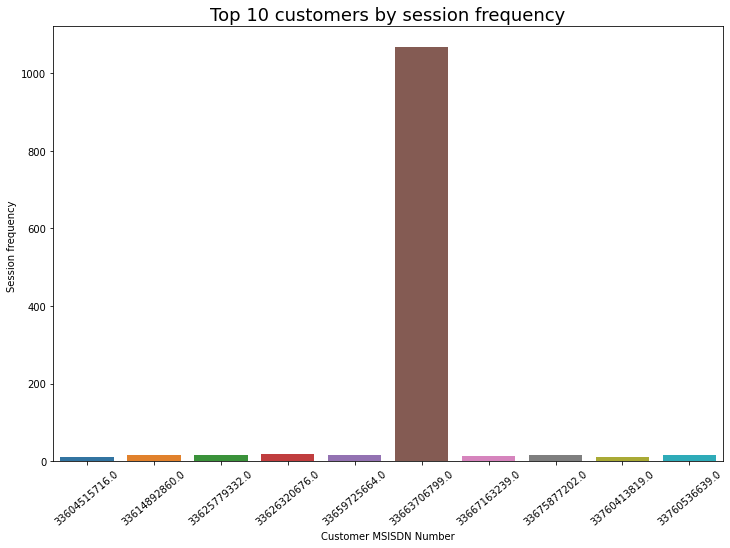

In [27]:
plt.subplots(figsize=(12,8))
sns.barplot(y='bearer_id',x='msisdn/number',data=top10_customers_by_session)
plt.xticks(rotation=40)
plt.xlabel("Customer MSISDN Number")
plt.ylabel("Session frequency ")
plt.title('Top 10 customers by session frequency',fontsize=18)

<i>`Top 10 customers based on duration of session`</i>

In [ ]:
top10_customers_by_sess_duration=df.groupby('MSISDN/Number').agg({'Dur. (ms)':'sum'}).reset_index().sort_values('Dur. (ms)',ascending=False).head(10)
top10_customers_by_sess_duration